In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import sys
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# where WellClass located
sys.path.append('../')

In [4]:
# WellClass
from libs.utils import (
    csv_parser,
    yaml_parser
)
from libs.well_class import Well
from libs.well_pressure import Pressure

# plots
from libs.plotting.plot_sketch import plot_sketch
from libs.plotting.plot_pressure import plot_pressure
from libs.plotting.plot_pt import plot_pt

# Load well CSV or yaml file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [5]:
use_yaml = True

In [6]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

root_path = '../../originals/'


In [7]:
# load the well information
if use_yaml:

    well_name = os.path.join(root_path, 'Simple_well.yaml')

    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    well_name = os.path.join(root_path, 'Simple_well.csv')
    well_csv = csv_parser(well_name)

In [8]:
!ls -l $well_name

-rw-rw-r-- 1 hzh scs_ccs 1538 Sep  1 21:07 ../../originals/Simple_well.yaml


In [9]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
                geology      = well_csv['geology'],
           )

In [10]:
# pressure
my_pressure = Pressure( header       = well_csv['well_header'], 
                        reservoir_P  = well_csv['reservoir_pressure'],
                        co2_datum    = well_csv['co2_datum'],
                        pvt_path     = root_path
)

Hydrostatic pressure at reference depth 1250 is 123.65
RP1 set as hydrostatic P = 123.65 bar
RP2 is set as delta pressure, which yields P = 123.65 +25.00 = 148.65 bar
RP3 is set as delta pressure, which yields P = 123.65 -25.00 = 98.65 bar
Reference depth: 1250.0


# Visualization

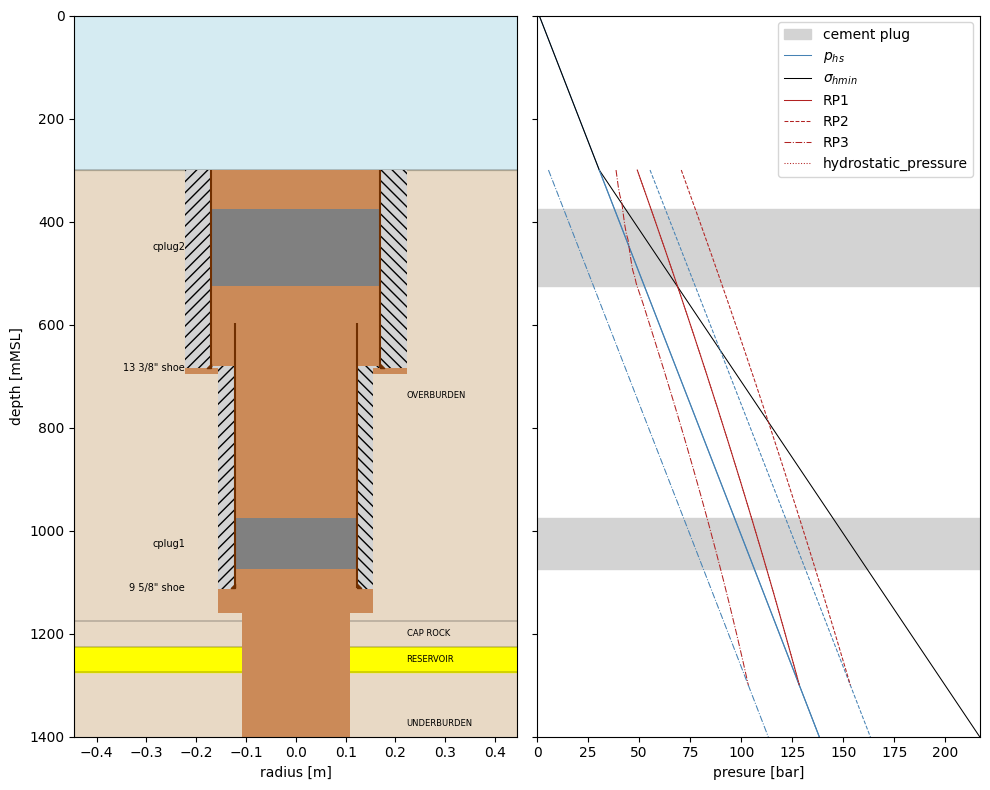

In [11]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2)

fig.tight_layout()

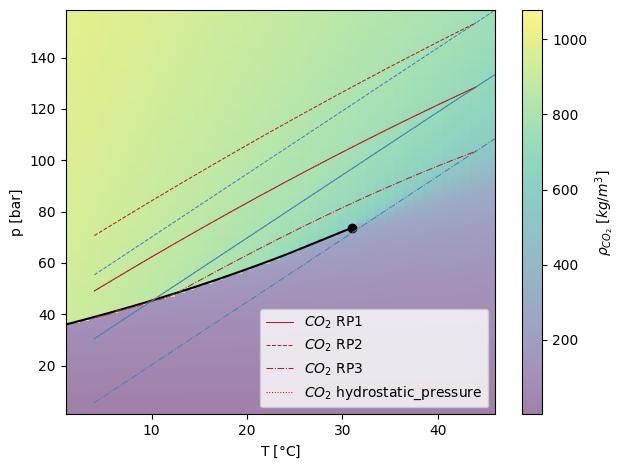

In [12]:
plot_pt(my_pressure)